In [1]:
from new_loader import TorchTensorFolderDataset
from torch.utils.data import DataLoader
import torch
import os
from torch.optim import AdamW
torch.manual_seed(42)

def get_loaders():
    train_path = os.path.join(os.getcwd(),"data\\preprocessed\\standard\\raw\\train")
    val_path = os.path.join(os.getcwd(),"data\\preprocessed\\standard\\raw\\validation")
    test_path = os.path.join(os.getcwd(),"data\\preprocessed\\standard\\raw\\test")
    
    train_dataset = TorchTensorFolderDataset(train_path)
    val_dataset = TorchTensorFolderDataset(val_path)
    test_dataset = TorchTensorFolderDataset(test_path)
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size = 16)
    val_loader = DataLoader(val_dataset, shuffle=False, batch_size = 16)
    test_loader = DataLoader(test_dataset, shuffle=False, batch_size = 256)

    return {"train":train_loader, "val":val_loader, "test":test_loader}

def get_denoised_loaders():
    
    train_path = os.path.join(os.getcwd(),"data\\preprocessed\\denoised\\raw\\train")
    val_path = os.path.join(os.getcwd(),"data\\preprocessed\\denoised\\raw\\validation")
    test_path = os.path.join(os.getcwd(),"data\\preprocessed\\denoised\\raw\\test")
    
    train_dataset = TorchTensorFolderDataset(train_path)
    val_dataset = TorchTensorFolderDataset(val_path)
    test_dataset = TorchTensorFolderDataset(test_path)
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size = 16)
    val_loader = DataLoader(val_dataset, shuffle=False, batch_size = 16)
    test_loader = DataLoader(test_dataset, shuffle=False, batch_size = 256)

    return {"train":train_loader, "val":val_loader, "test":test_loader}

In [2]:
from CNN_transfomers_implementation import Mel_transformer, RawAudioTransformer, train_transformer
loaders = get_loaders()
train_loader, val_loader = loaders["train"], loaders["val"]

In [3]:
spect_model = Mel_transformer(num_classes=30)
optimizer = AdamW(spect_model.parameters(),0.00005,weight_decay=0.001)
train_transformer(spect_model,optimizer, train_loader, val_loader,verbose=True)


Epoch 1: Train Loss: 1.0220 | Train Acc: 0.7256 | Val Acc: 0.8850


Epoch 2: Train Loss: 0.2688 | Train Acc: 0.9261 | Val Acc: 0.9078


Epoch 3: Train Loss: 0.1836 | Train Acc: 0.9478 | Val Acc: 0.9285


Epoch 4: Train Loss: 0.1446 | Train Acc: 0.9597 | Val Acc: 0.9307


Epoch 5: Train Loss: 0.1167 | Train Acc: 0.9665 | Val Acc: 0.9351


Epoch 6: Train Loss: 0.0985 | Train Acc: 0.9724 | Val Acc: 0.9259


Epoch 7: Train Loss: 0.0853 | Train Acc: 0.9760 | Val Acc: 0.9359


Epoch 8: Train Loss: 0.0774 | Train Acc: 0.9779 | Val Acc: 0.9347


Epoch 9: Train Loss: 0.0662 | Train Acc: 0.9811 | Val Acc: 0.9412


Epoch 10: Train Loss: 0.0592 | Train Acc: 0.9826 | Val Acc: 0.9391


Epoch 11: Train Loss: 0.0547 | Train Acc: 0.9842 | Val Acc: 0.9419


Epoch 12: Train Loss: 0.0437 | Train Acc: 0.9874 | Val Acc: 0.9332


Epoch 13: Train Loss: 0.0417 | Train Acc: 0.9874 | Val Acc: 0.9401


Epoch 14: Train Loss: 0.0351 | Train Acc: 0.9897 | Val Acc: 0.9384
Early stopping triggered at epoch 14
Best Val Acc: 0.9419


In [4]:
torch.save(spect_model.state_dict(), 'models/standard_2d.pth')

Test accuracy 0.9476


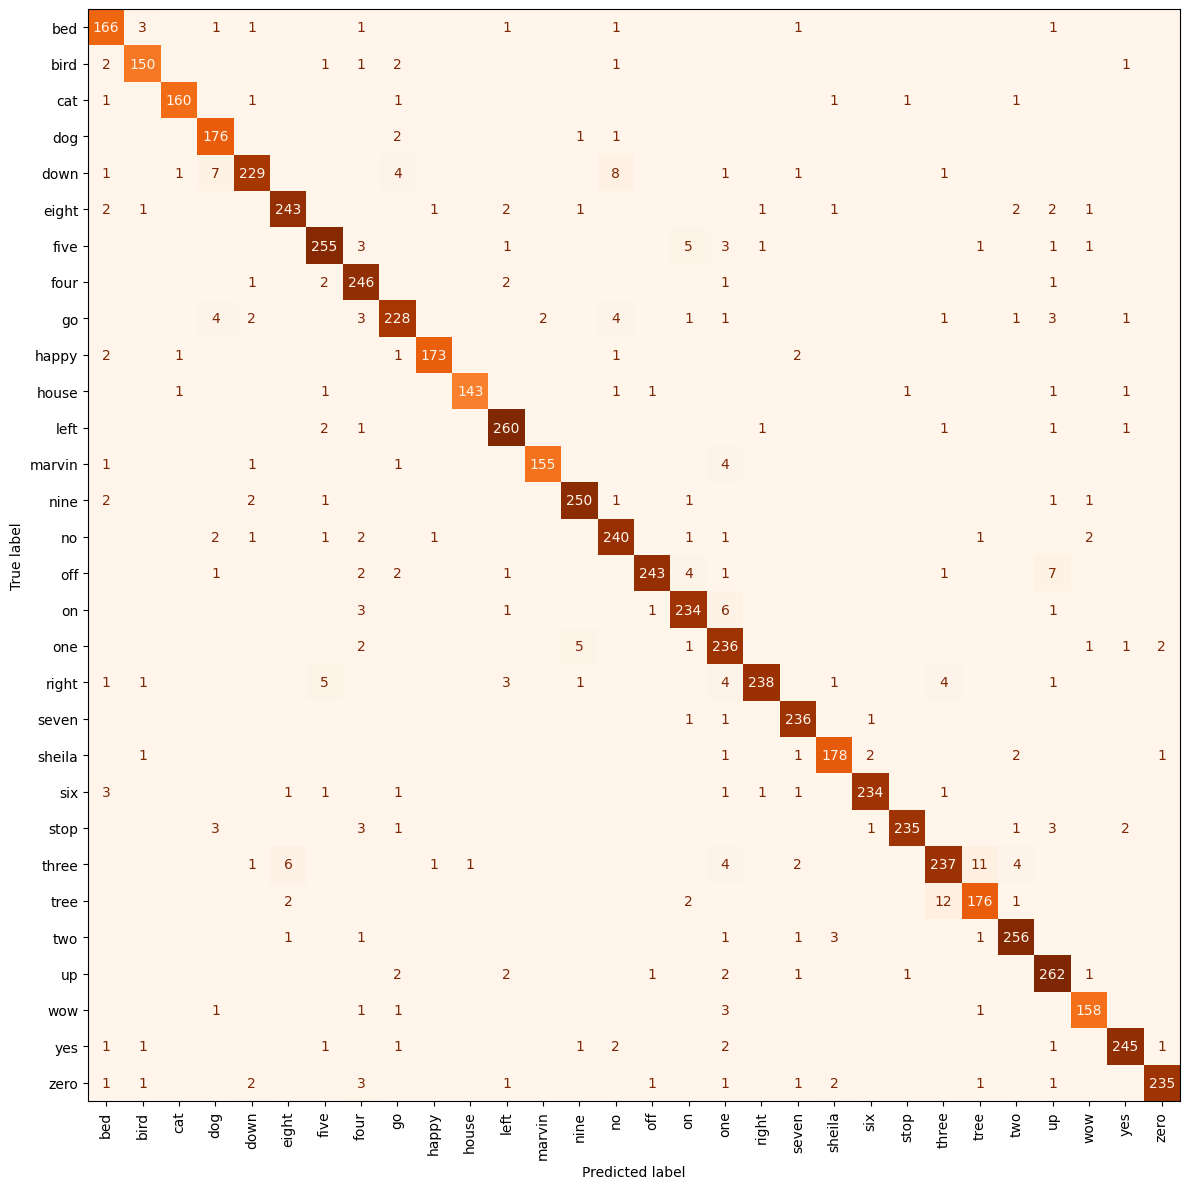

In [5]:
from tester import get_confusion_matrix
from CNN_transfomers_implementation import evaluate_model
test_loss, test_acc =evaluate_model(spect_model,loaders["test"])
print("Test accuracy", test_acc)
get_confusion_matrix(spect_model,loaders["test"])

In [3]:
raw_model = RawAudioTransformer(num_classes=30)
optimizer = AdamW(raw_model.parameters(),0.0005,weight_decay=0.001)
train_transformer(raw_model, optimizer,train_loader, val_loader,verbose=True)


Epoch 1: Train Loss: 2.2971 | Train Acc: 0.2983 | Val Acc: 0.4422


Epoch 2: Train Loss: 1.3599 | Train Acc: 0.5812 | Val Acc: 0.6409


Epoch 3: Train Loss: 0.9947 | Train Acc: 0.6942 | Val Acc: 0.7058


Epoch 4: Train Loss: 0.8073 | Train Acc: 0.7518 | Val Acc: 0.7052


Epoch 5: Train Loss: 0.6875 | Train Acc: 0.7886 | Val Acc: 0.7773


Epoch 6: Train Loss: 0.6106 | Train Acc: 0.8121 | Val Acc: 0.7995


Epoch 7: Train Loss: 0.5528 | Train Acc: 0.8275 | Val Acc: 0.8139


Epoch 8: Train Loss: 0.5046 | Train Acc: 0.8433 | Val Acc: 0.8049


Epoch 9: Train Loss: 0.4688 | Train Acc: 0.8561 | Val Acc: 0.8295


Epoch 10: Train Loss: 0.4422 | Train Acc: 0.8619 | Val Acc: 0.8230


Epoch 11: Train Loss: 0.4147 | Train Acc: 0.8708 | Val Acc: 0.8254


Epoch 12: Train Loss: 0.3979 | Train Acc: 0.8751 | Val Acc: 0.8427


Epoch 13: Train Loss: 0.3772 | Train Acc: 0.8816 | Val Acc: 0.8410


Epoch 14: Train Loss: 0.3569 | Train Acc: 0.8869 | Val Acc: 0.8317


Epoch 15: Train Loss: 0.3479 | Train Acc: 0.8896 | Val Acc: 0.8425
Early stopping triggered at epoch 15
Best Val Acc: 0.8427


In [4]:
torch.save(raw_model.state_dict(), 'models/standard_1d.pth')

Test accuracy 0.8364


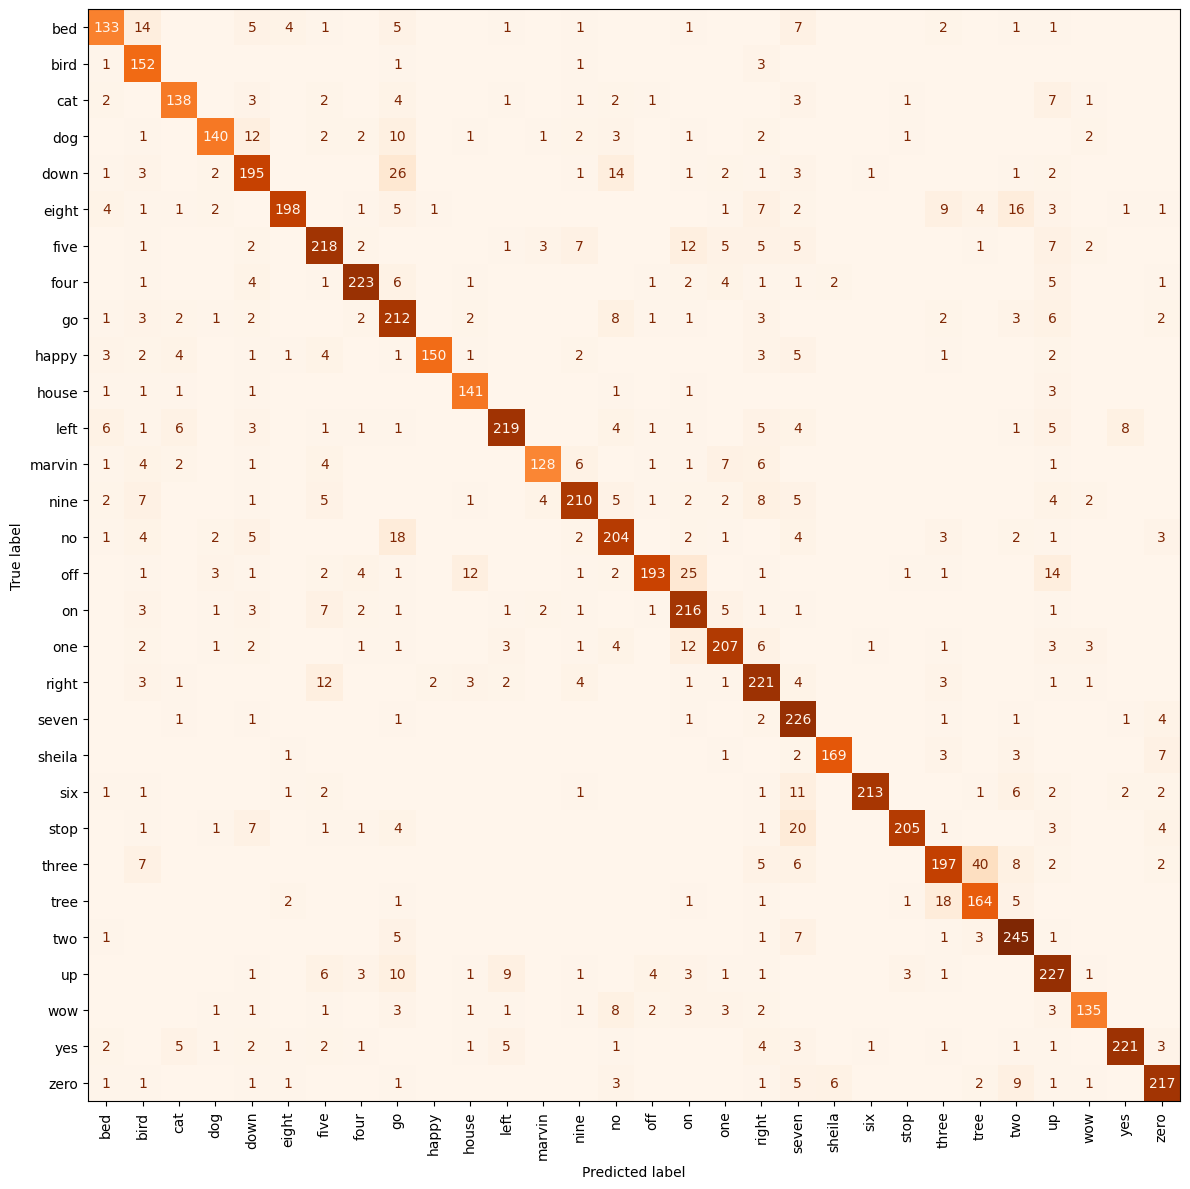

In [6]:
from tester import get_confusion_matrix
from CNN_transfomers_implementation import evaluate_model
test_loss, test_acc =evaluate_model(raw_model,loaders["test"])
print("Test accuracy", test_acc)
get_confusion_matrix(raw_model,loaders["test"])

In [3]:
loaders = get_denoised_loaders()
train_loader, val_loader = loaders["train"], loaders["val"]

In [4]:
raw_model = RawAudioTransformer(num_classes=30)
optimizer = AdamW(raw_model.parameters(),0.0005,weight_decay=0.001)
train_transformer(raw_model,optimizer, train_loader, val_loader,verbose=True)


Epoch 1: Train Loss: 2.2863 | Train Acc: 0.3004 | Val Acc: 0.5116


Epoch 2: Train Loss: 1.2718 | Train Acc: 0.6100 | Val Acc: 0.4932


Epoch 3: Train Loss: 0.9264 | Train Acc: 0.7169 | Val Acc: 0.7148


Epoch 4: Train Loss: 0.7457 | Train Acc: 0.7707 | Val Acc: 0.7349


Epoch 5: Train Loss: 0.6372 | Train Acc: 0.8056 | Val Acc: 0.7743


Epoch 6: Train Loss: 0.5663 | Train Acc: 0.8268 | Val Acc: 0.7449


Epoch 7: Train Loss: 0.5173 | Train Acc: 0.8423 | Val Acc: 0.7904


Epoch 8: Train Loss: 0.4773 | Train Acc: 0.8526 | Val Acc: 0.7449


Epoch 9: Train Loss: 0.4465 | Train Acc: 0.8620 | Val Acc: 0.8241


Epoch 10: Train Loss: 0.4210 | Train Acc: 0.8693 | Val Acc: 0.8239


Epoch 11: Train Loss: 0.3971 | Train Acc: 0.8776 | Val Acc: 0.8207


Epoch 12: Train Loss: 0.3855 | Train Acc: 0.8801 | Val Acc: 0.8351


Epoch 13: Train Loss: 0.3687 | Train Acc: 0.8856 | Val Acc: 0.8494


Epoch 14: Train Loss: 0.3541 | Train Acc: 0.8904 | Val Acc: 0.7663


Epoch 15: Train Loss: 0.3346 | Train Acc: 0.8946 | Val Acc: 0.7411


Epoch 16: Train Loss: 0.3227 | Train Acc: 0.8995 | Val Acc: 0.8551


Epoch 17: Train Loss: 0.3090 | Train Acc: 0.9033 | Val Acc: 0.8607


Epoch 18: Train Loss: 0.2993 | Train Acc: 0.9059 | Val Acc: 0.8376


Epoch 19: Train Loss: 0.2916 | Train Acc: 0.9077 | Val Acc: 0.8407


Epoch 20: Train Loss: 0.2780 | Train Acc: 0.9137 | Val Acc: 0.8547
Early stopping triggered at epoch 20
Best Val Acc: 0.8607


In [5]:
torch.save(raw_model.state_dict(), 'models/denoised_1d.pth')

Test accuracy 0.855


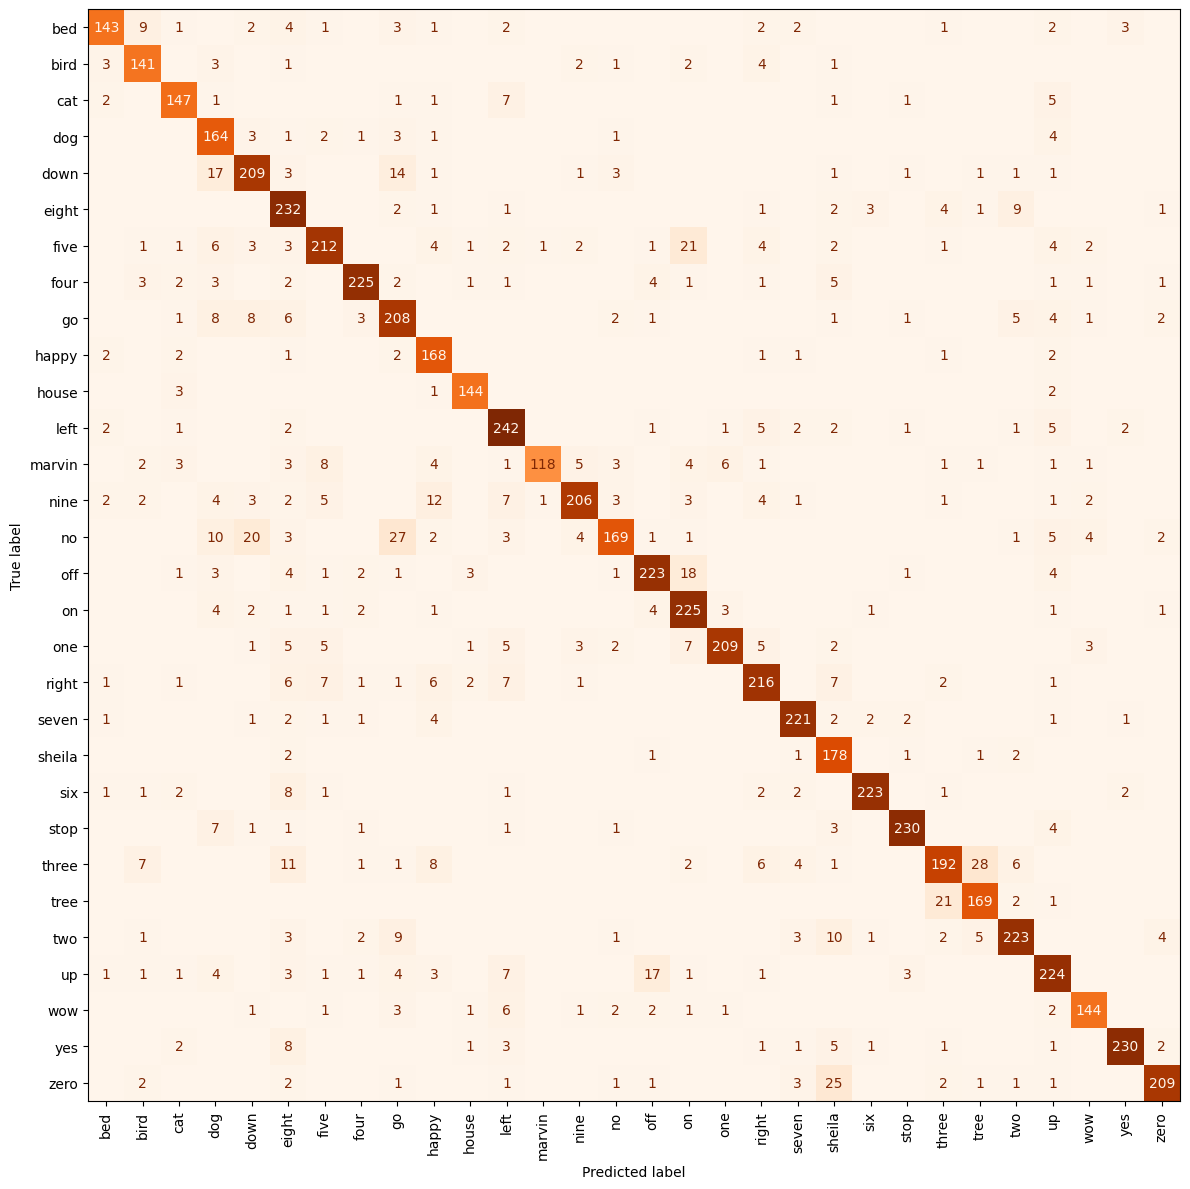

In [6]:
from tester import get_confusion_matrix
from CNN_transfomers_implementation import evaluate_model
test_loss, test_acc =evaluate_model(raw_model,loaders["test"])
print("Test accuracy", test_acc)
get_confusion_matrix(raw_model,loaders["test"])

In [7]:
spect_model = Mel_transformer(num_classes=30)
optimizer = AdamW(spect_model.parameters(),0.00005,weight_decay=0.001)
train_transformer(spect_model,optimizer, train_loader, val_loader,verbose=True)


Epoch 1: Train Loss: 0.8944 | Train Acc: 0.7679 | Val Acc: 0.8972


Epoch 2: Train Loss: 0.2597 | Train Acc: 0.9287 | Val Acc: 0.9214


Epoch 3: Train Loss: 0.1827 | Train Acc: 0.9481 | Val Acc: 0.9340


Epoch 4: Train Loss: 0.1447 | Train Acc: 0.9583 | Val Acc: 0.9320


Epoch 5: Train Loss: 0.1187 | Train Acc: 0.9659 | Val Acc: 0.9390


Epoch 6: Train Loss: 0.1015 | Train Acc: 0.9708 | Val Acc: 0.9275


Epoch 7: Train Loss: 0.0873 | Train Acc: 0.9750 | Val Acc: 0.9403


Epoch 8: Train Loss: 0.0774 | Train Acc: 0.9775 | Val Acc: 0.9409


Epoch 9: Train Loss: 0.0687 | Train Acc: 0.9802 | Val Acc: 0.9450


Epoch 10: Train Loss: 0.0634 | Train Acc: 0.9811 | Val Acc: 0.9469


Epoch 11: Train Loss: 0.0538 | Train Acc: 0.9844 | Val Acc: 0.9384


Epoch 12: Train Loss: 0.0490 | Train Acc: 0.9855 | Val Acc: 0.9345


Epoch 13: Train Loss: 0.0405 | Train Acc: 0.9879 | Val Acc: 0.9447
Early stopping triggered at epoch 13
Best Val Acc: 0.9469


In [8]:
torch.save(spect_model.state_dict(), 'models/denoised_2d.pth')

Test accuracy 0.9422


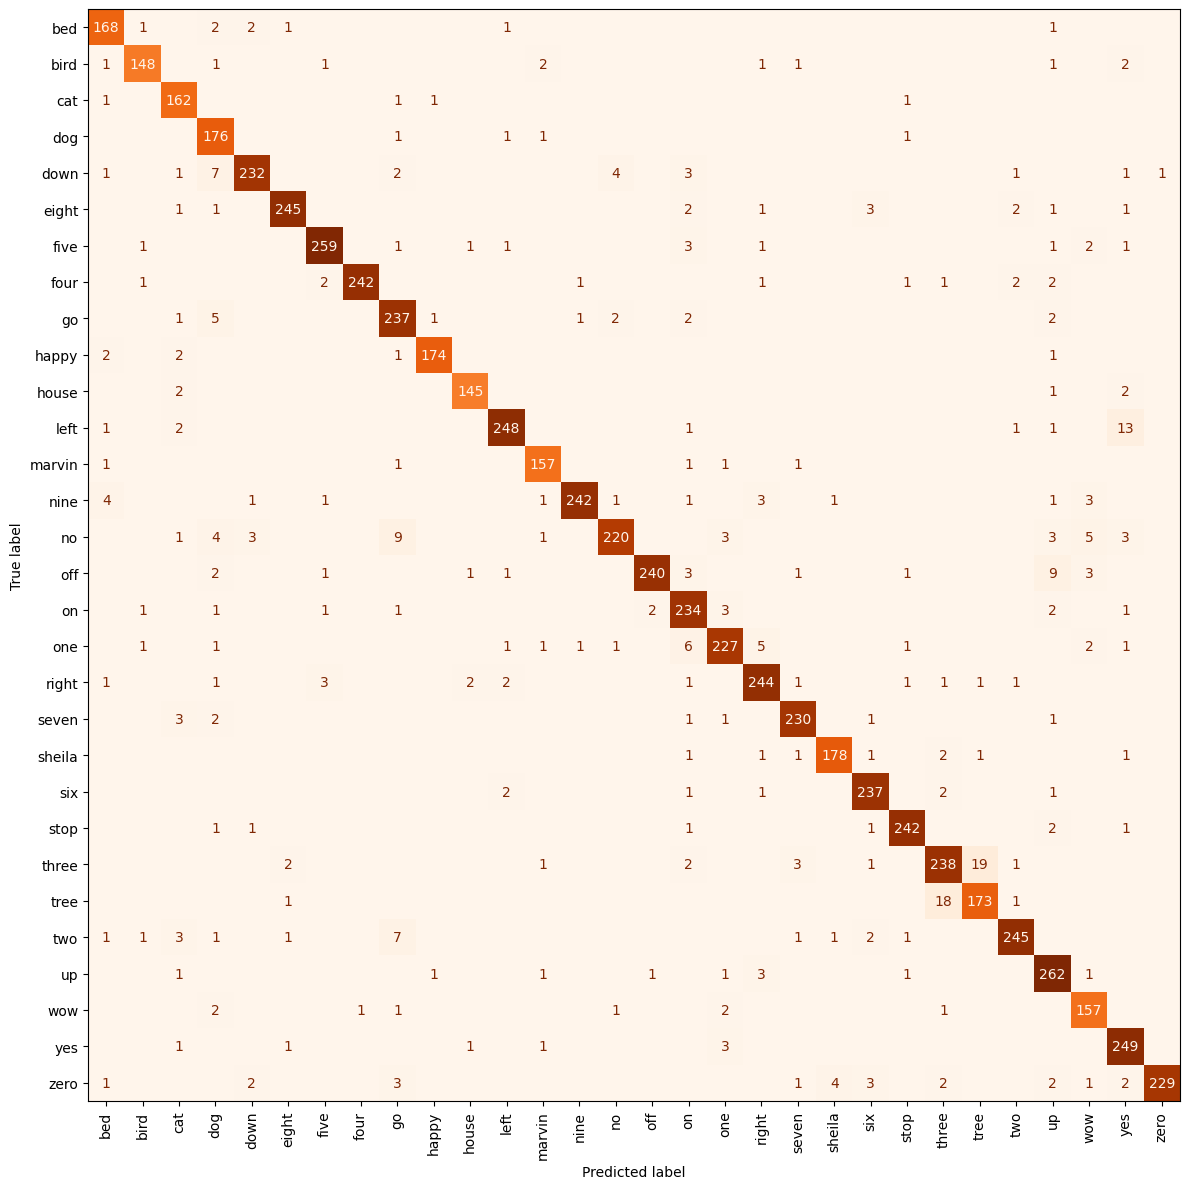

In [9]:
test_loss, test_acc =evaluate_model(spect_model,loaders["test"])
print("Test accuracy", test_acc)
get_confusion_matrix(spect_model,loaders["test"])